# Steps
Explore over a century of Olympic Games data to analyze athlete performances, country-wise medal counts, and trends across different sports. This project offers a comprehensive look at historical sports data and the opportunity to create compelling visual narratives.


## Data loading

Load the two CSV files into pandas DataFrames.


Load the two CSV files into pandas DataFrames and display the first 5 rows of each.



In [10]:
import pandas as pd

athlete_events_df = pd.read_csv('athlete_events.csv')
display(athlete_events_df.head())

noc_regions_df = pd.read_csv('noc_regions.csv')
display(noc_regions_df.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## Data exploration

Explore the loaded datasets to understand their structure, identify missing values, and compute descriptive statistics.


Examine the shape and data types, descriptive statistics for numerical columns, missing values, and unique values/frequencies for categorical columns in the two dataframes.



In [11]:
# Examine the shape and data types of each DataFrame
print("Shape of athlete_events_df:", athlete_events_df.shape)
print("\nData types of athlete_events_df:\n", athlete_events_df.dtypes)
print("\nShape of noc_regions_df:", noc_regions_df.shape)
print("\nData types of noc_regions_df:\n", noc_regions_df.dtypes)

# Analyze descriptive statistics for numerical columns in athlete_events_df
print("\nDescriptive statistics for numerical columns in athlete_events_df:\n", athlete_events_df.describe())

# Check for missing values
print("\nMissing values in athlete_events_df:\n", athlete_events_df.isnull().sum())
print("\nMissing values in noc_regions_df:\n", noc_regions_df.isnull().sum())

# Analyze categorical columns
categorical_cols = ['Sport', 'Season', 'Medal', 'NOC']
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}' in athlete_events_df:")
    print(athlete_events_df[col].value_counts())

print(f"\nUnique values and frequencies for 'region' in noc_regions_df:")
print(noc_regions_df['region'].value_counts())

print(f"\nUnique values and frequencies for 'NOC' in noc_regions_df:")
print(noc_regions_df['NOC'].value_counts())

Shape of athlete_events_df: (271116, 15)

Data types of athlete_events_df:
 ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

Shape of noc_regions_df: (230, 3)

Data types of noc_regions_df:
 NOC       object
region    object
notes     object
dtype: object

Descriptive statistics for numerical columns in athlete_events_df:
                   ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000     

## Data wrangling

Merge the athlete and NOC dataframes, handle missing values, and create new features.


Merge the two dataframes, handle missing values, create new features, and convert data types as instructed.



In [12]:
# Merge the two dataframes
merged_df = pd.merge(athlete_events_df, noc_regions_df, on='NOC', how='left')

# Handle missing values
# Impute missing numerical values with the median
for col in ['Age', 'Height', 'Weight']:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

# Replace missing 'Medal' values with 'No Medal'
merged_df['Medal'] = merged_df['Medal'].fillna('No Medal')

# For missing 'region' values, replace with 'Unknown'
merged_df['region'] = merged_df['region'].fillna('Unknown')

# Create BMI feature
merged_df['BMI'] = merged_df['Weight'] / ((merged_df['Height'] / 100) ** 2)
merged_df['BMI'] = merged_df['BMI'].replace([float('inf'), float('-inf')], float('nan'))
merged_df['BMI'] = merged_df['BMI'].fillna(merged_df['BMI'].median())

# Create Age Category feature
def categorize_age(age):
    if age <= 18:
        return 'Youth'
    elif age <= 35:
        return 'Adult'
    else:
        return 'Senior'

merged_df['Age_Category'] = merged_df['Age'].apply(categorize_age)

# Convert data types
for col in ['Age', 'Height', 'Weight', 'Year', 'BMI']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

display(merged_df.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI,Age_Category
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN,24.691358,Adult
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN,20.761246,Adult
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN,22.857143,Adult
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,22.857143,Adult
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN,23.959094,Adult


## Data analysis

Analyze medal counts per country, athlete performance, and trends in sports participation.


Group the data by country and year, aggregate medal counts, and identify the top 10 countries.



In [13]:
import pandas as pd

# Group by country and year, aggregating medal counts
medal_counts = merged_df.groupby(['region', 'Year'])['Medal'].value_counts().unstack(fill_value=0)
medal_counts['Total'] = medal_counts.sum(axis=1)

# Identify the top 10 countries by total medal count
top_10_countries = medal_counts.groupby('region')['Total'].sum().nlargest(10).index
top_10_medal_counts = medal_counts.loc[top_10_countries]

display(top_10_medal_counts.head())

Medal        Bronze  Gold  No Medal  Silver  Total
region Year                                       
USA    1896       2    11         7       7     27
       1900      17    30        72      16    135
       1904     125   128       715     141   1109
       1906       6    12        57       6     81
       1908      15    34       154      16    219

Analyze trends in medal counts for the top 10 countries over time by plotting the total medal counts.



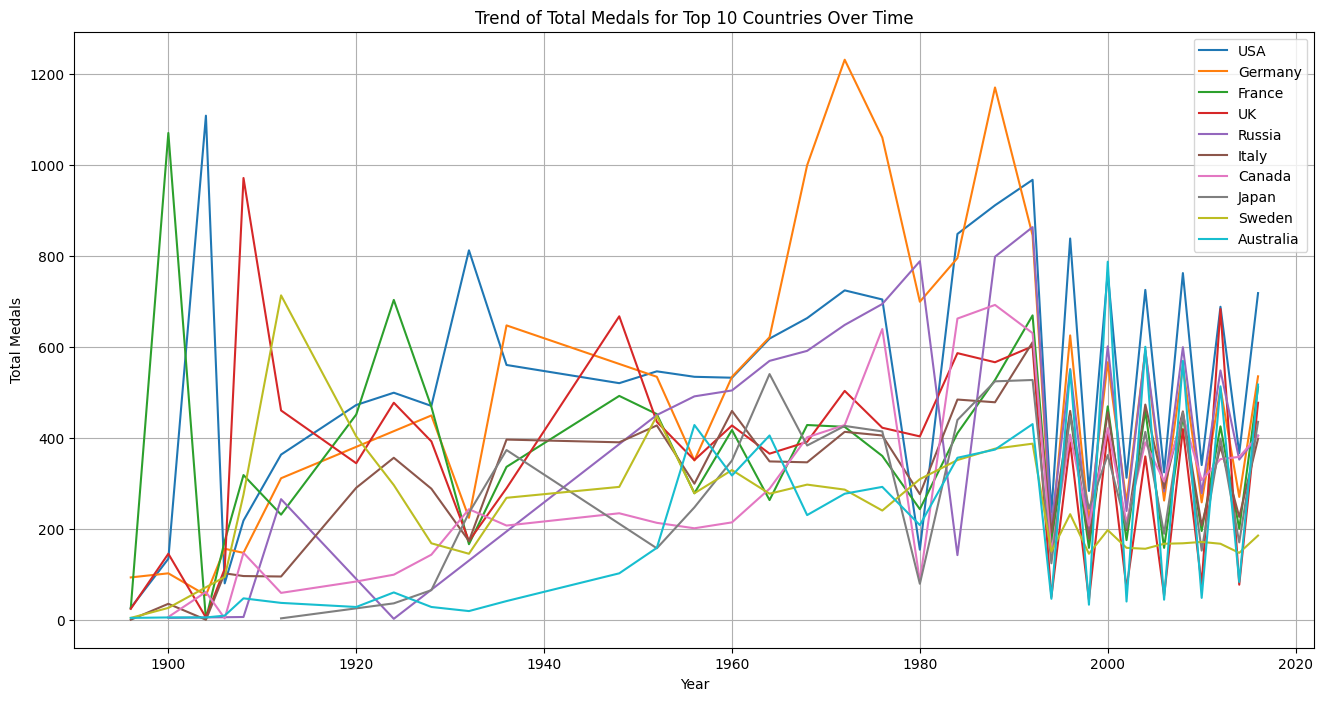

In [14]:
import matplotlib.pyplot as plt

# Plotting trends in medal counts for top 10 countries
plt.figure(figsize=(16, 8))
for country in top_10_countries:
    try:
        country_data = top_10_medal_counts.loc[country]
        plt.plot(country_data.index, country_data['Total'], label=country)
    except KeyError:
        print(f"No data found for {country}")
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Trend of Total Medals for Top 10 Countries Over Time')
plt.legend()
plt.grid(True)
plt.show()

Analyze the distributions of age, height, and weight for athletes in different sports.



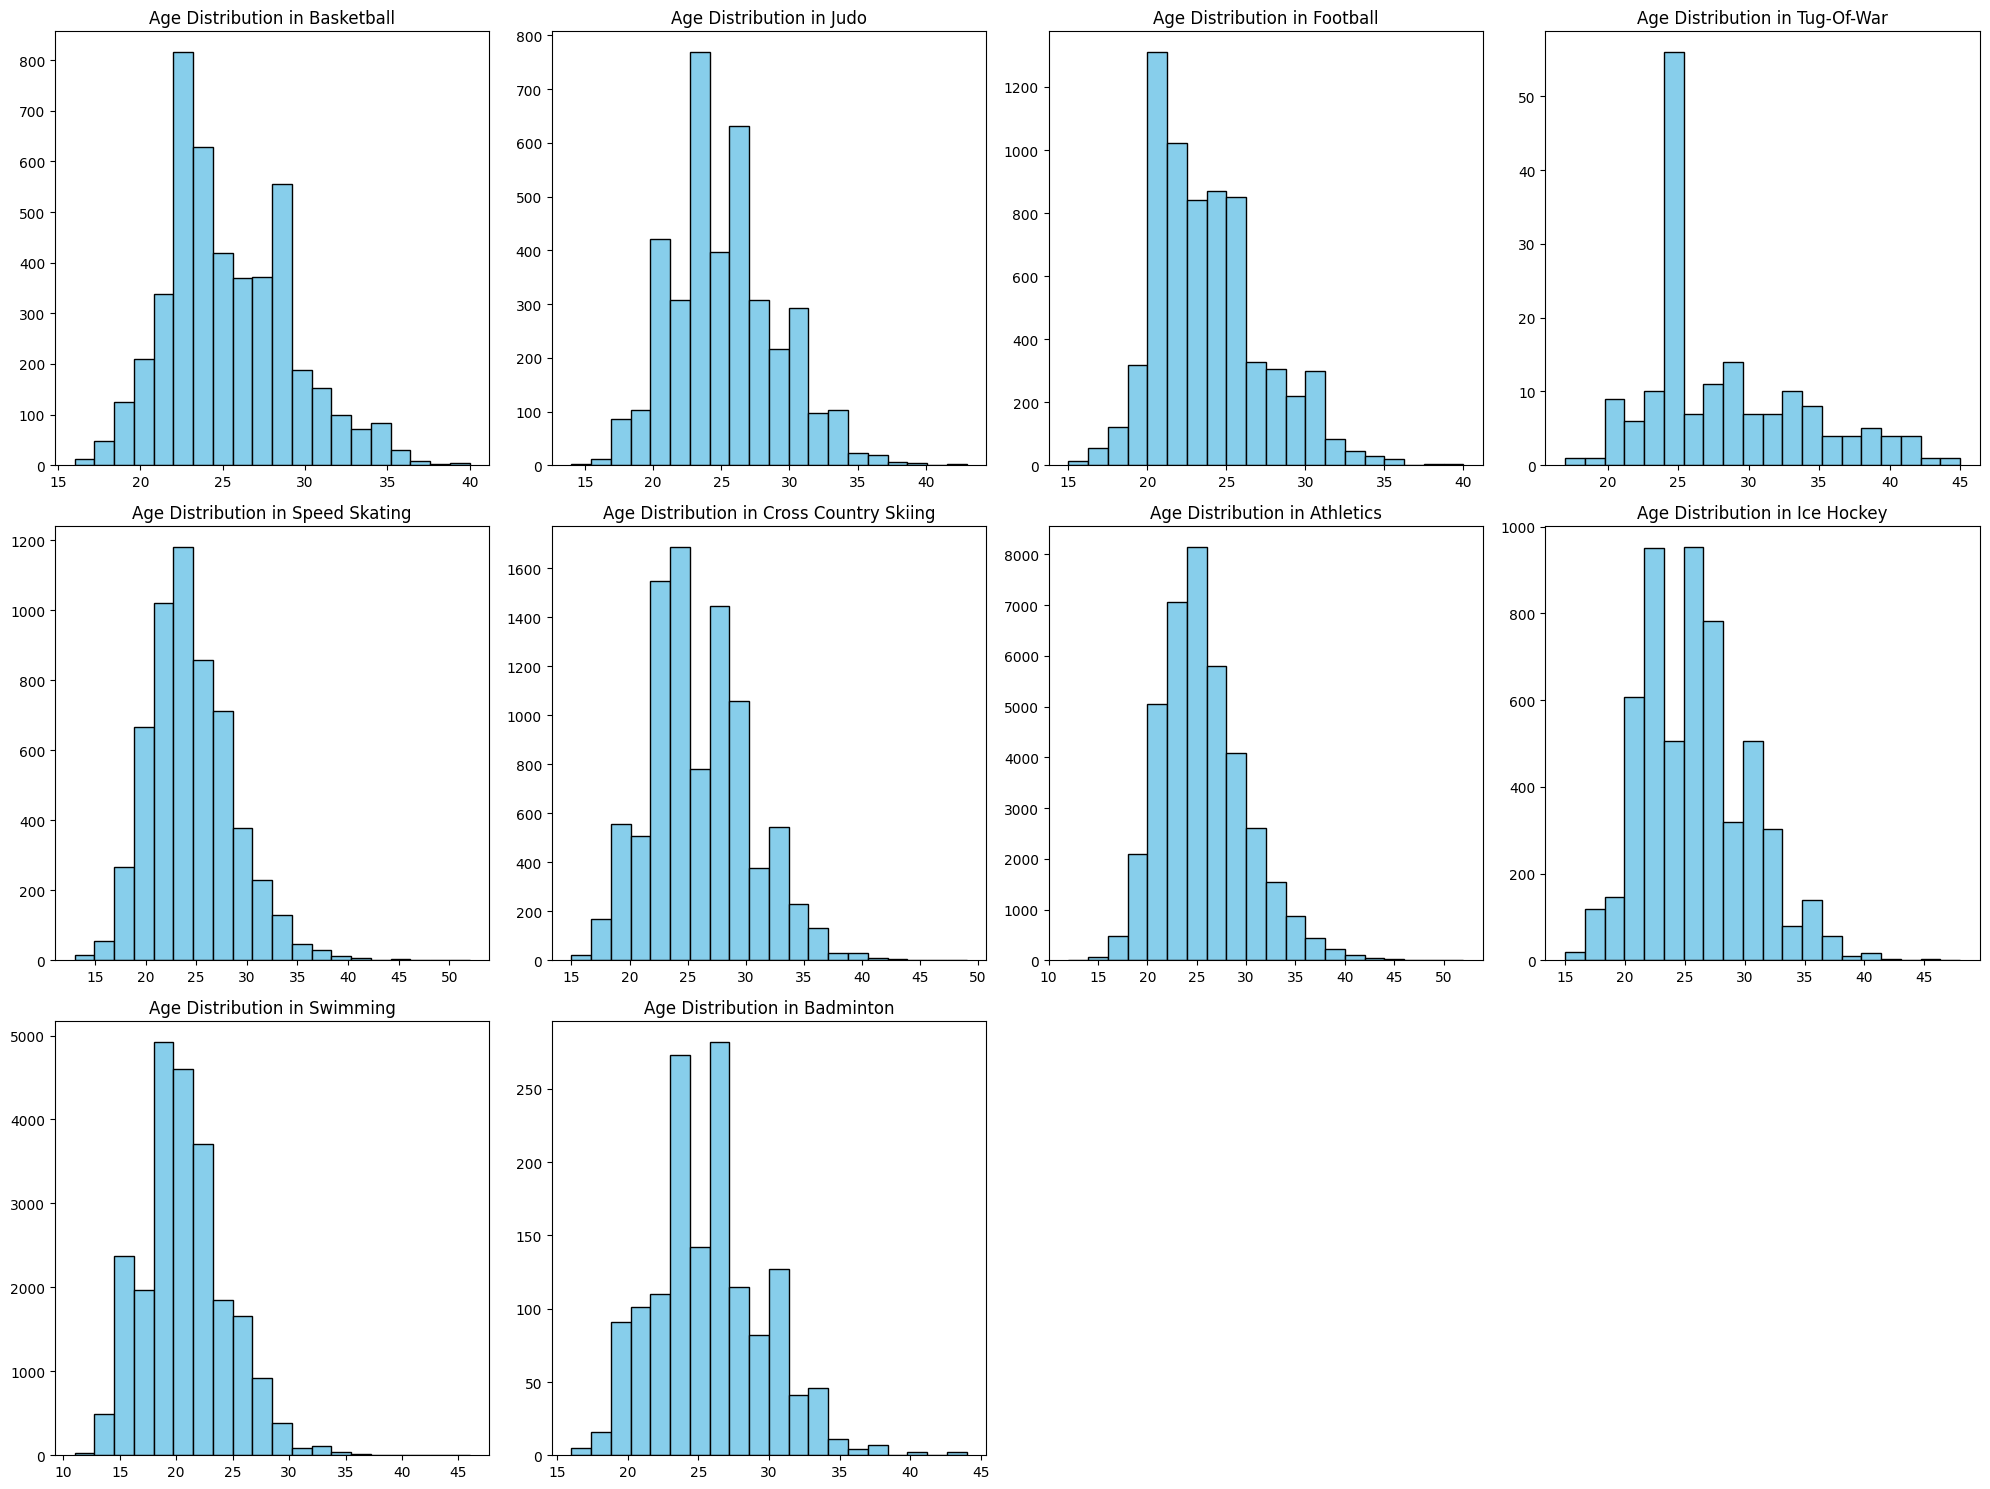

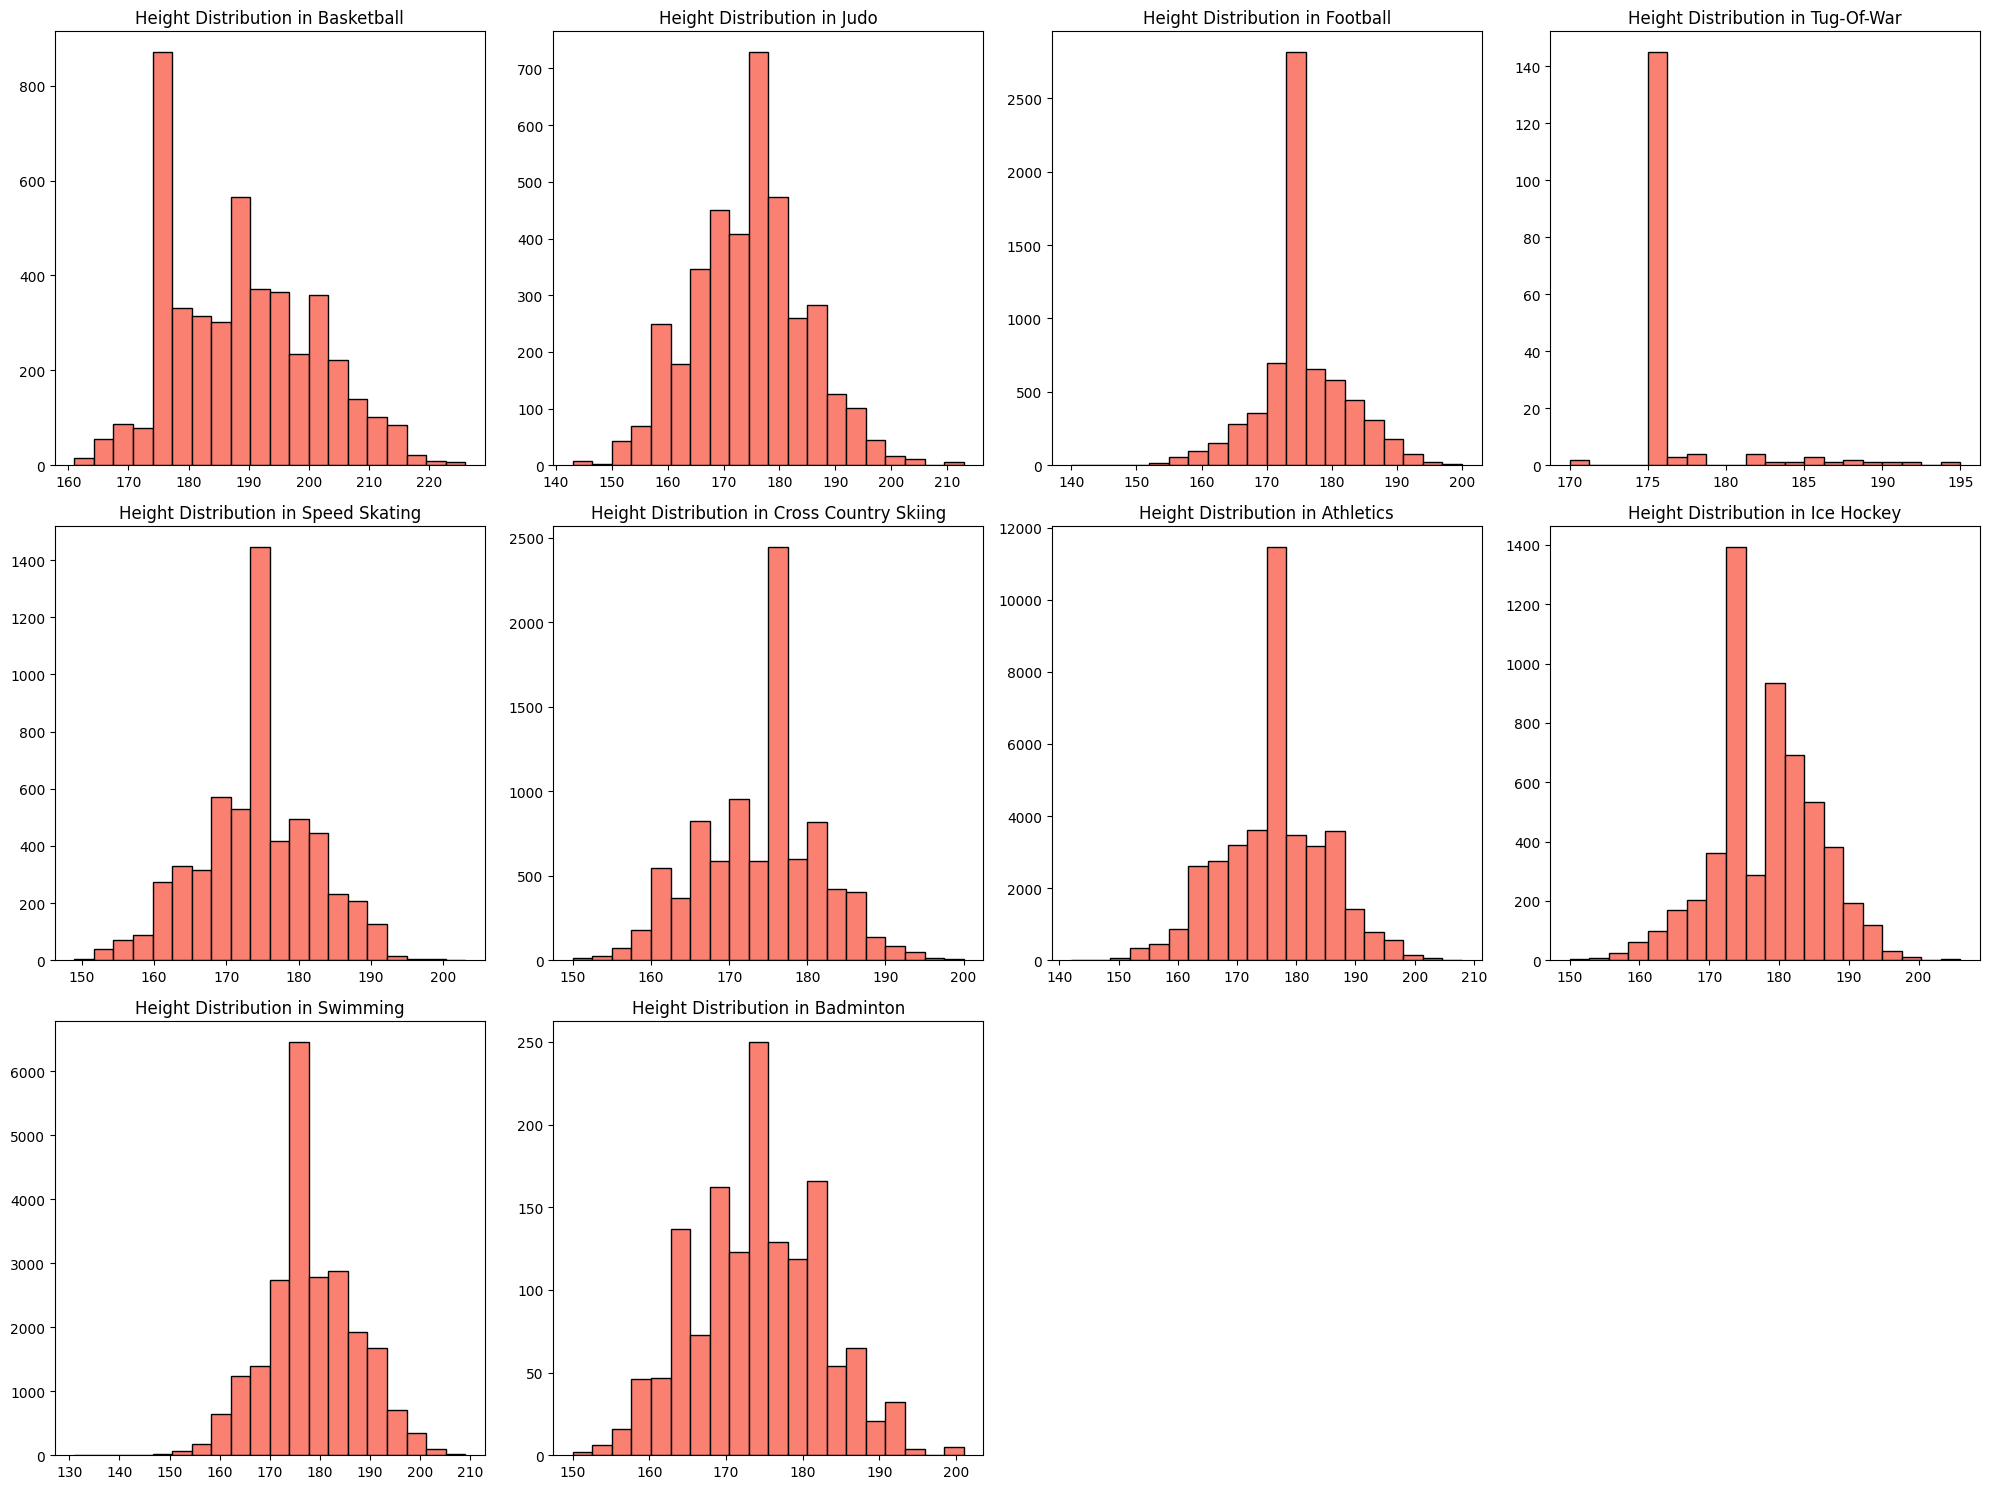

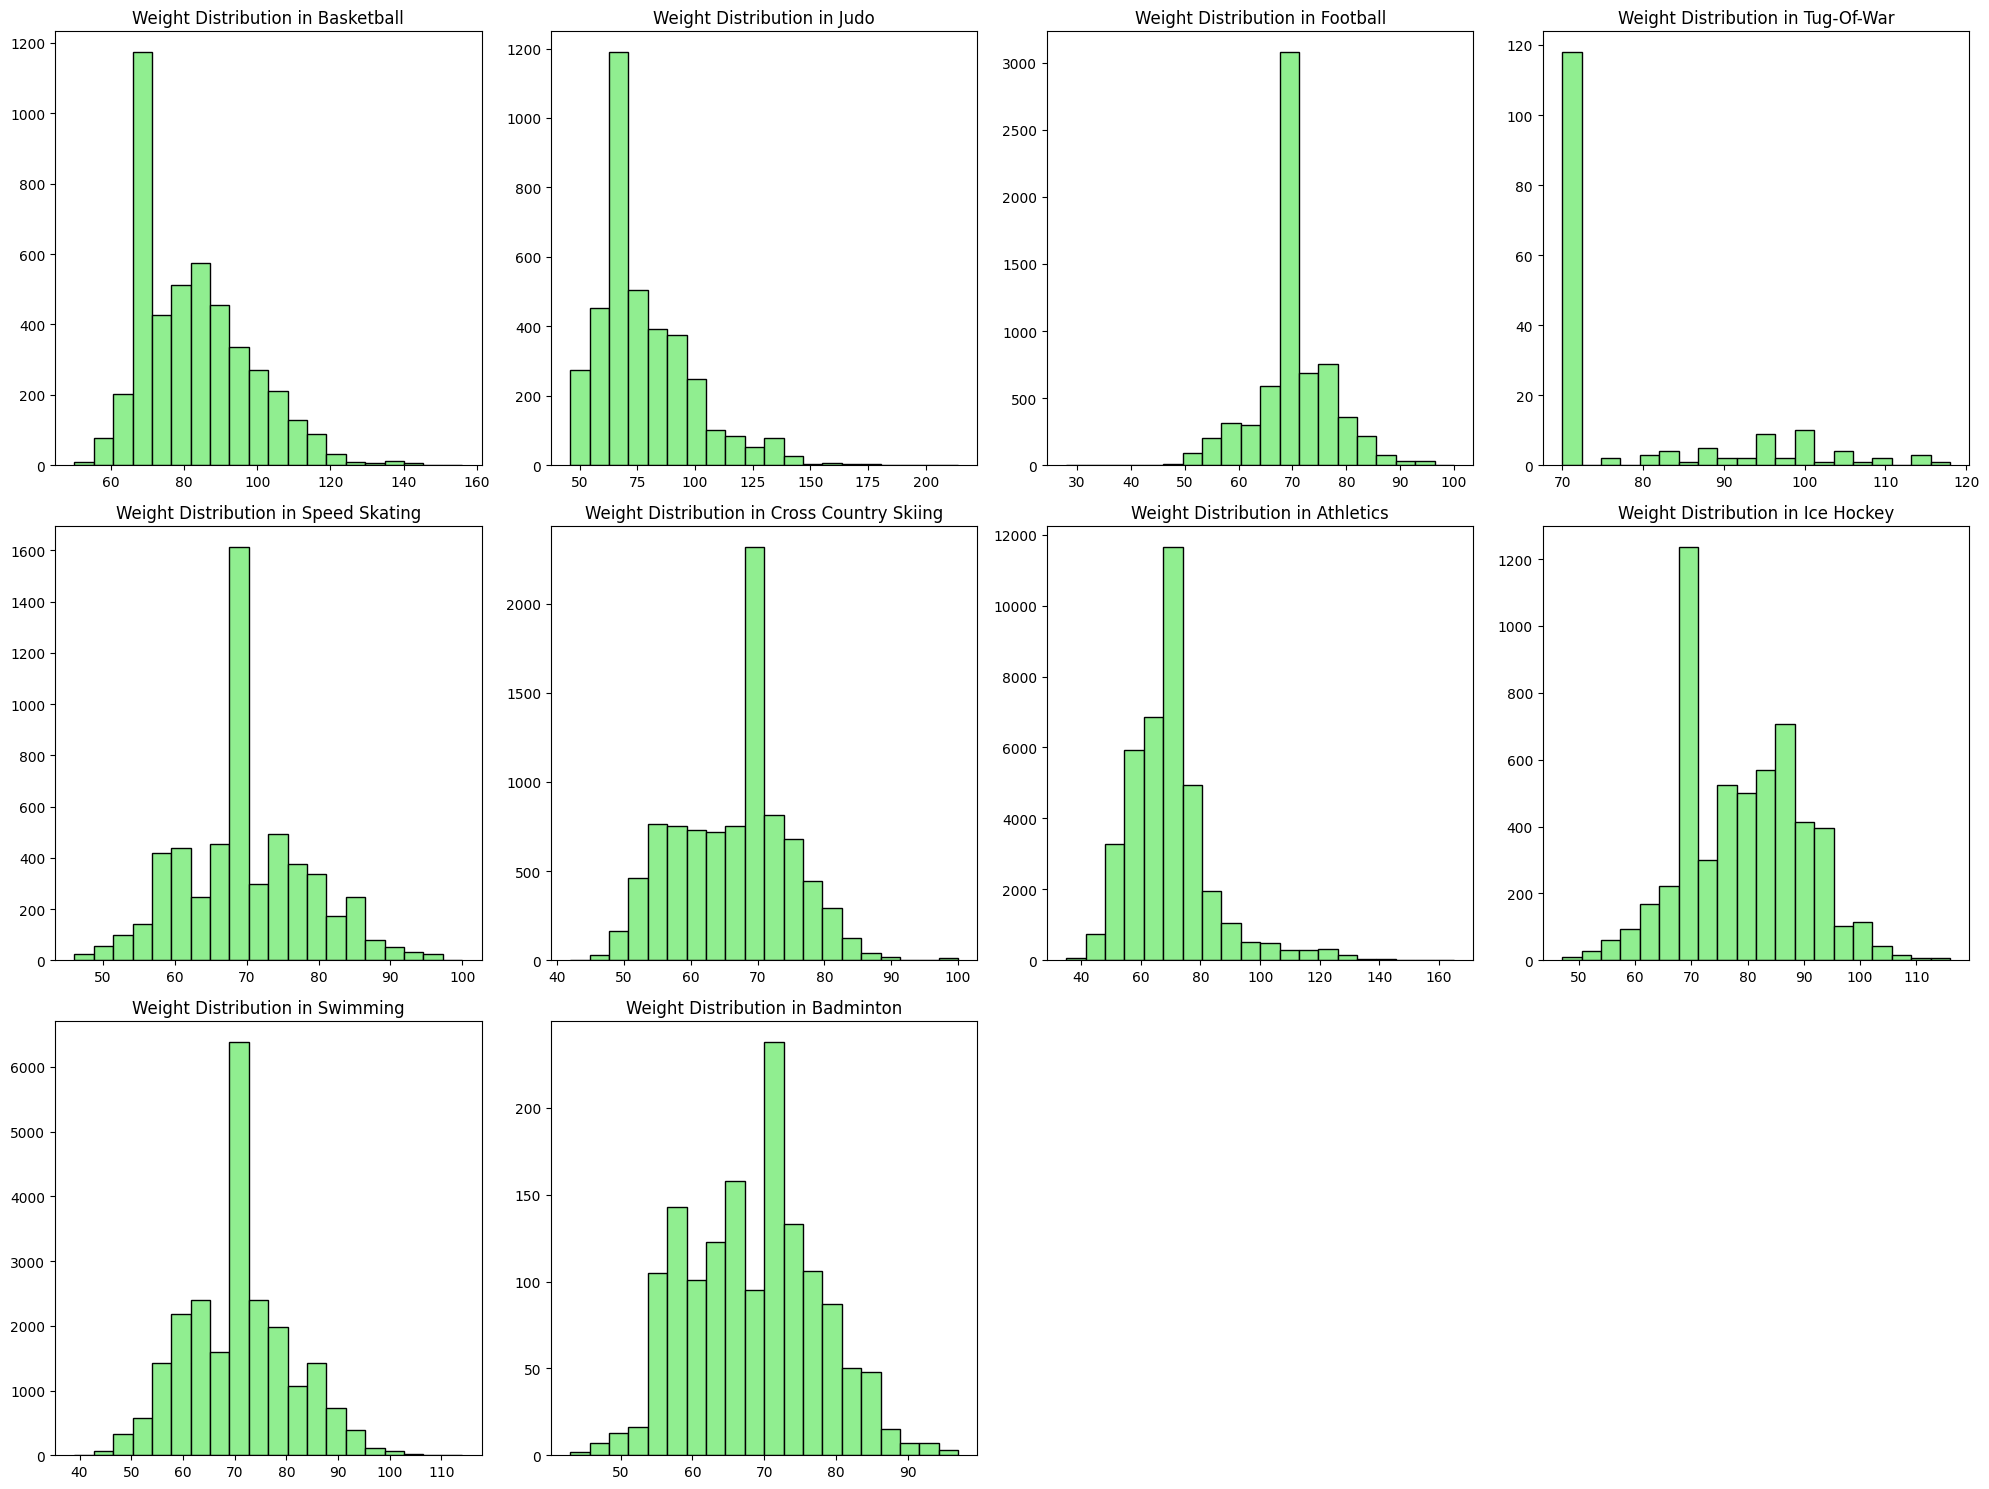

In [15]:
import matplotlib.pyplot as plt

# Analyze distributions of age, height, and weight for athletes in different sports
sports = merged_df['Sport'].unique()
plt.figure(figsize=(20, 15))

for i, sport in enumerate(sports[:10]):  # Analyze for the first 10 sports
    plt.subplot(3, 4, i + 1)
    plt.hist(merged_df[merged_df['Sport'] == sport]['Age'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Age Distribution in {sport}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, sport in enumerate(sports[:10]):
  plt.subplot(3, 4, i + 1)
  plt.hist(merged_df[merged_df['Sport'] == sport]['Height'], bins=20, color='salmon', edgecolor='black')
  plt.title(f'Height Distribution in {sport}')

plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 15))
for i, sport in enumerate(sports[:10]):
  plt.subplot(3, 4, i + 1)
  plt.hist(merged_df[merged_df['Sport'] == sport]['Weight'], bins=20, color='lightgreen', edgecolor='black')
  plt.title(f'Weight Distribution in {sport}')

plt.tight_layout()
plt.show()

Investigate correlations between physical attributes (age, height, weight) and medal wins.



<ipython-input-16-c489ffe069de>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medal', y='Age', data=merged_df, palette="Set3")
<ipython-input-16-c489ffe069de>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medal', y='Height', data=merged_df, palette="Set3")
<ipython-input-16-c489ffe069de>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medal', y='Weight', data=merged_df, palette="Set3")


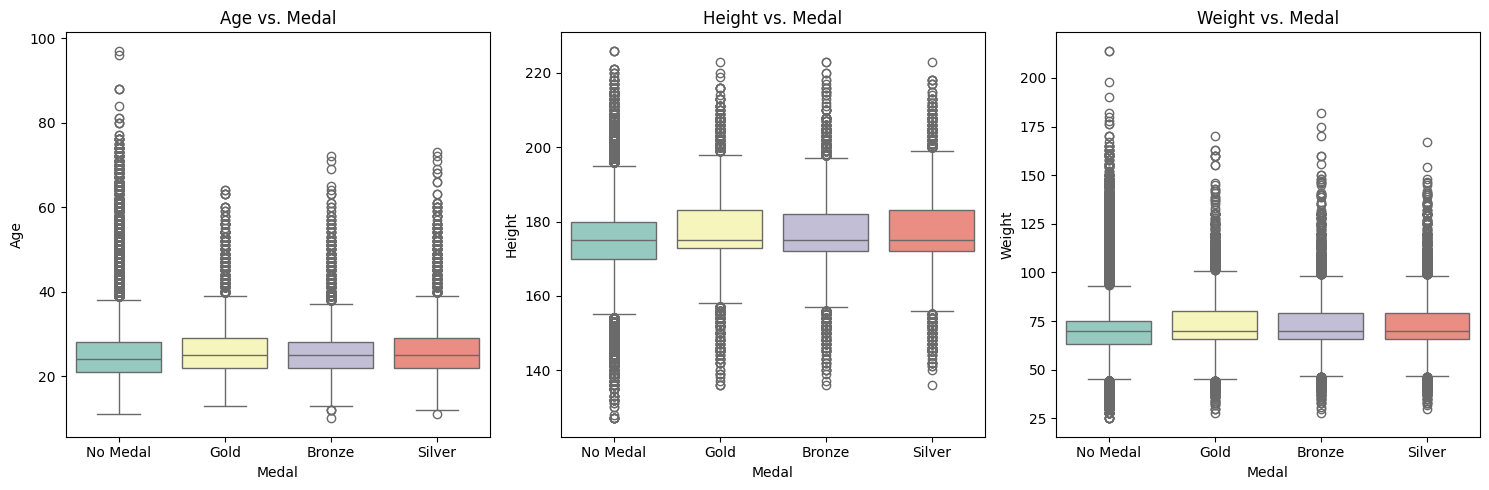

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation between physical attributes and medal wins
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Medal', y='Age', data=merged_df, palette="Set3")
plt.title('Age vs. Medal')

plt.subplot(1, 3, 2)
sns.boxplot(x='Medal', y='Height', data=merged_df, palette="Set3")
plt.title('Height vs. Medal')

plt.subplot(1, 3, 3)
sns.boxplot(x='Medal', y='Weight', data=merged_df, palette="Set3")
plt.title('Weight vs. Medal')

plt.tight_layout()
plt.show()

Analyze the number of athletes participating in different sports over the years to identify sports with increasing or decreasing participation.



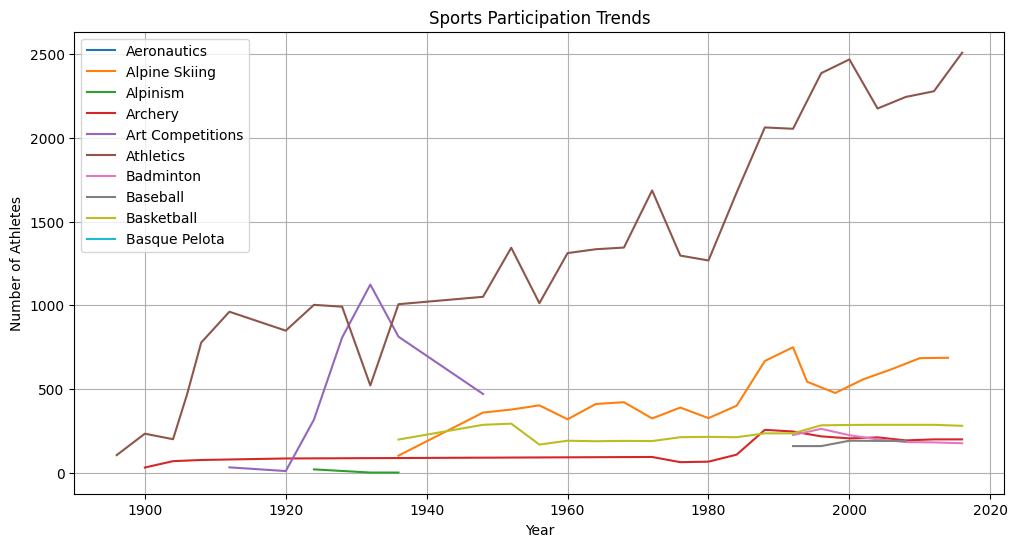

In [17]:
import matplotlib.pyplot as plt

# Analyze sports participation trends
sports_participation = merged_df.groupby(['Sport', 'Year'])['ID'].count().reset_index()
plt.figure(figsize=(12, 6))
for sport in sports_participation['Sport'].unique()[:10]:  # Analyze the first 10 sports
    sport_data = sports_participation[sports_participation['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['ID'], label=sport)

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Sports Participation Trends')
plt.legend()
plt.grid(True)
plt.show()

## Data visualization

Visualize the key findings from the data analysis.


**Reasoning**:
Visualize the key findings from the data analysis by creating visualizations for country-wise medal counts, athlete performance distributions, and sports participation trends.



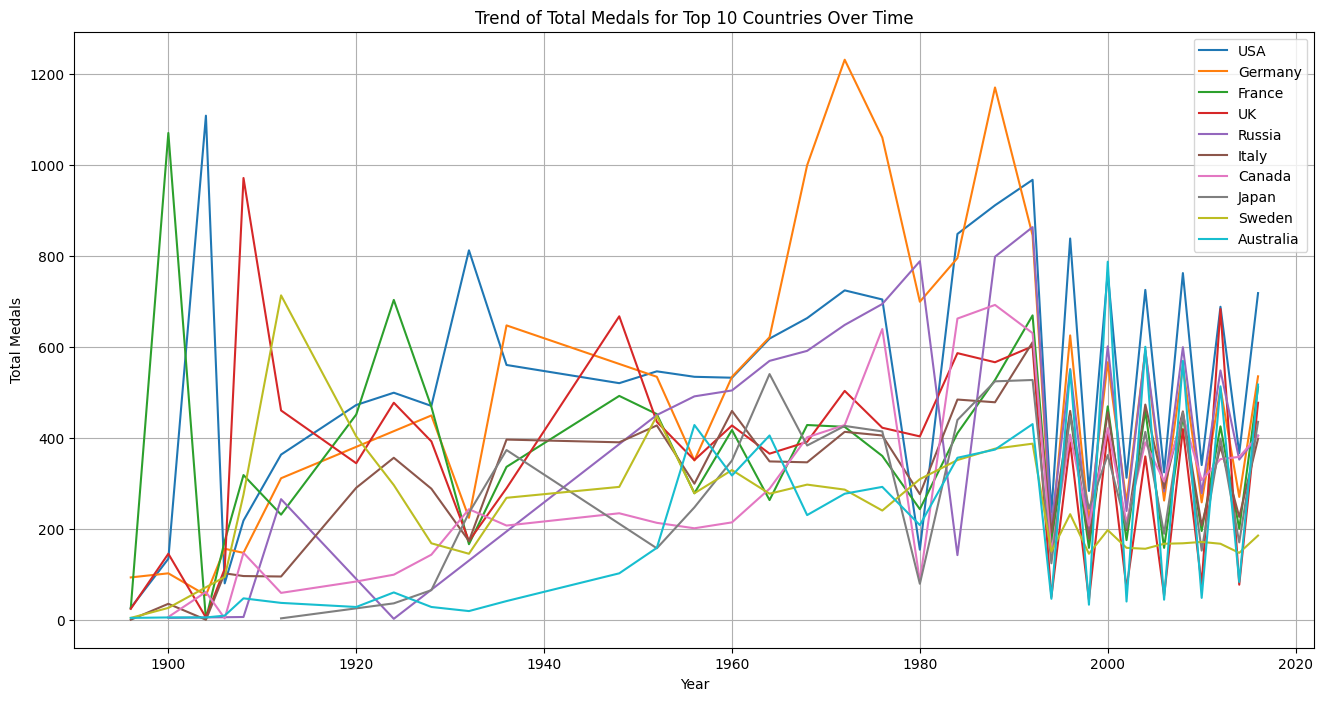

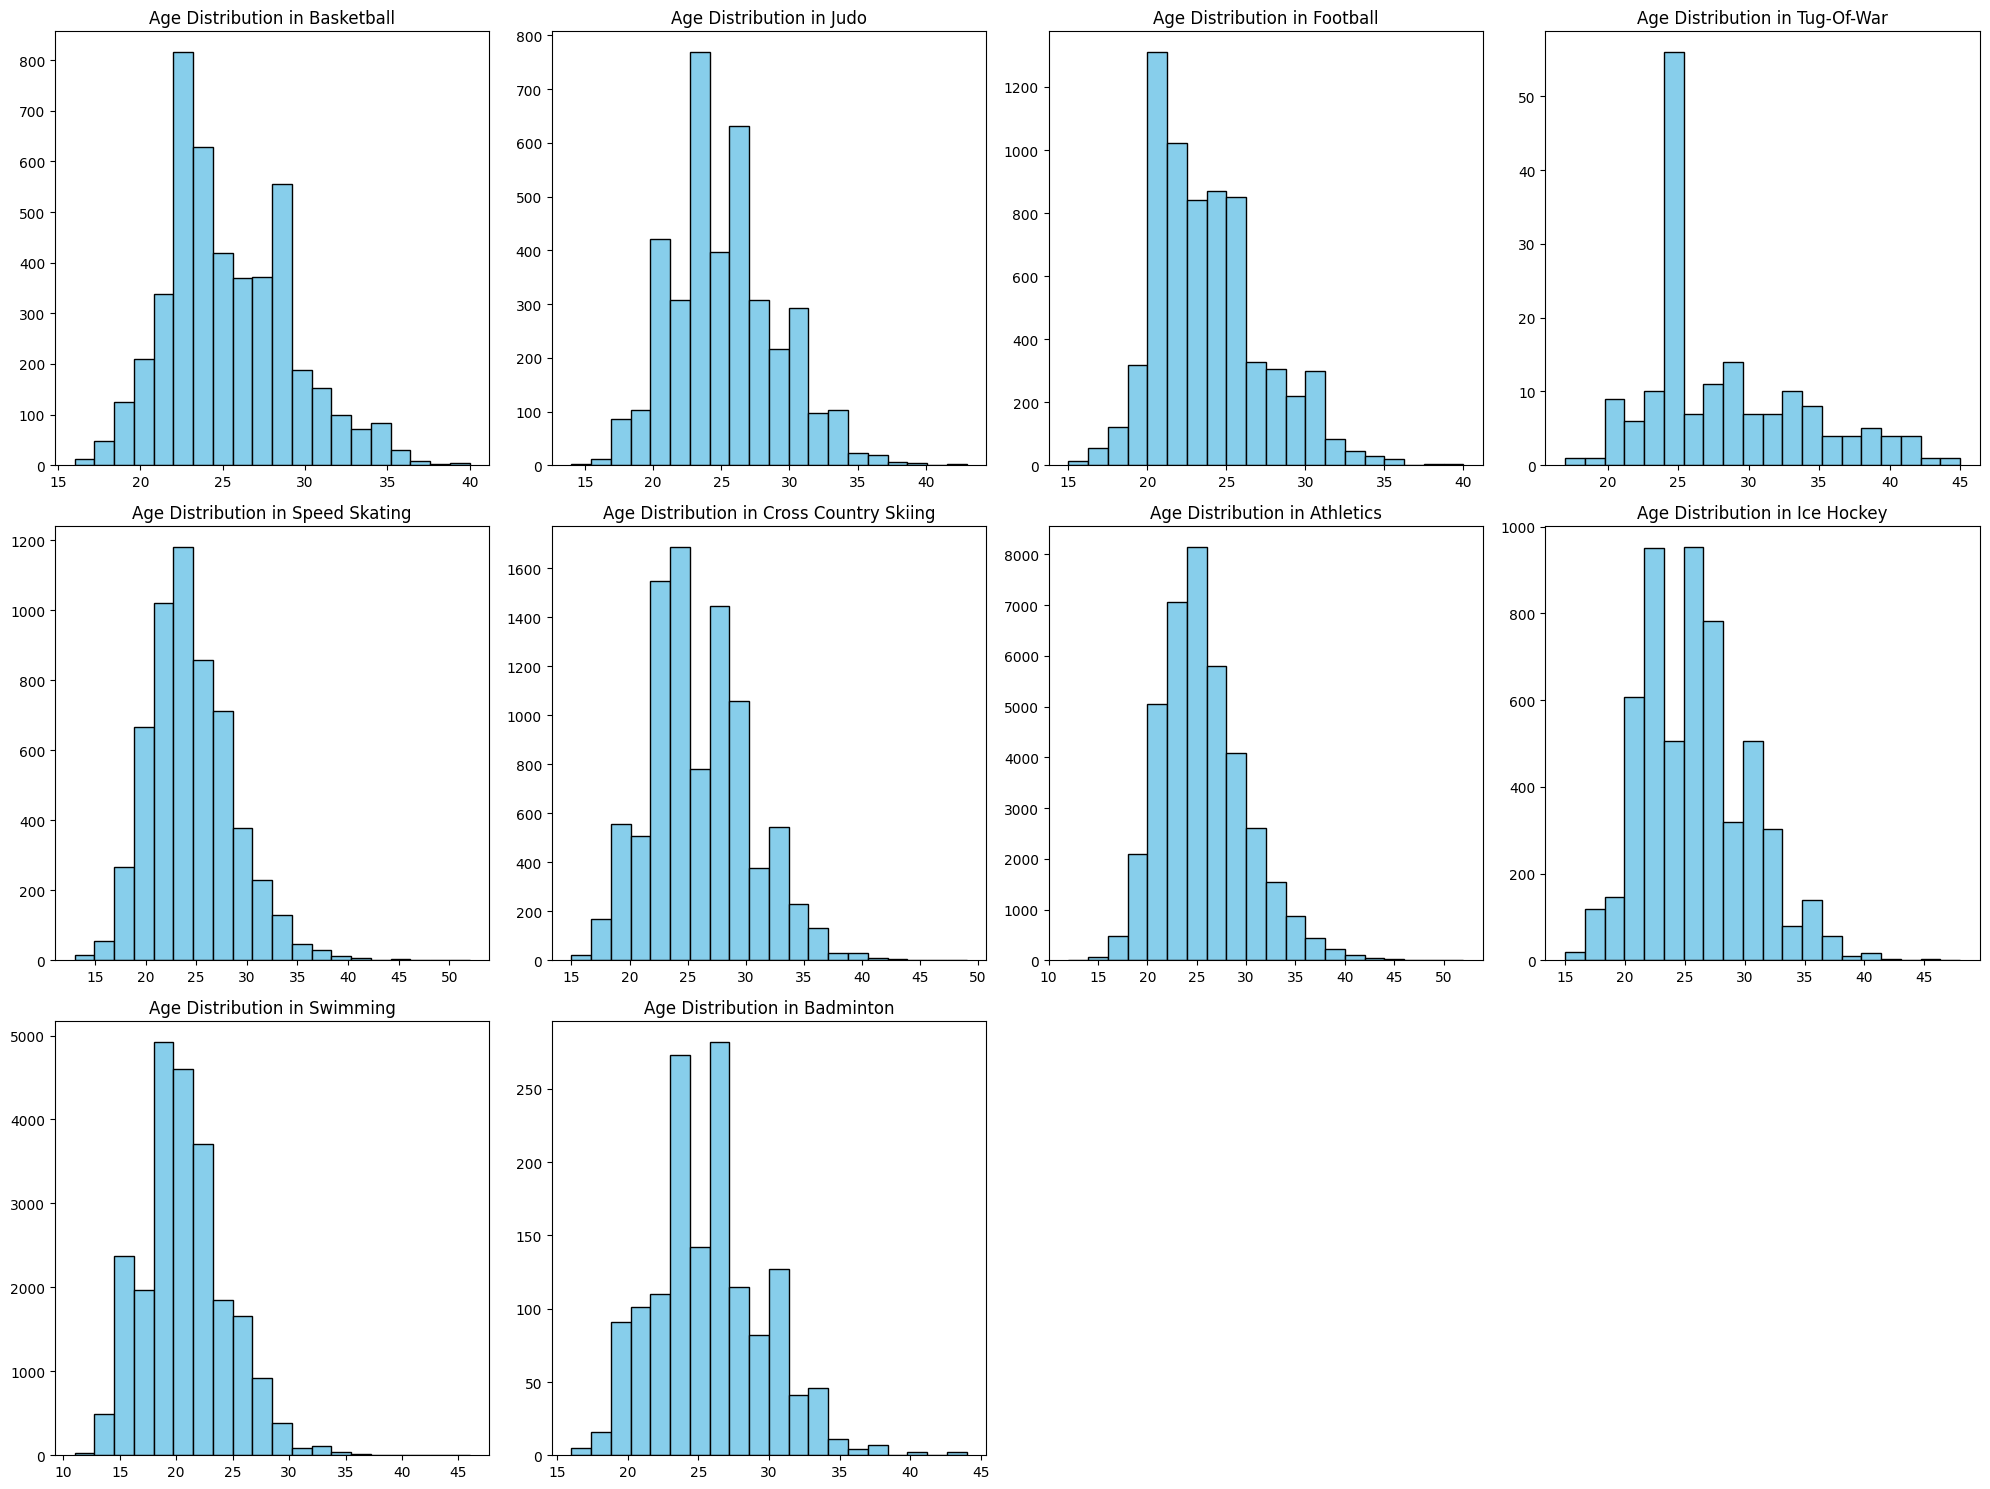

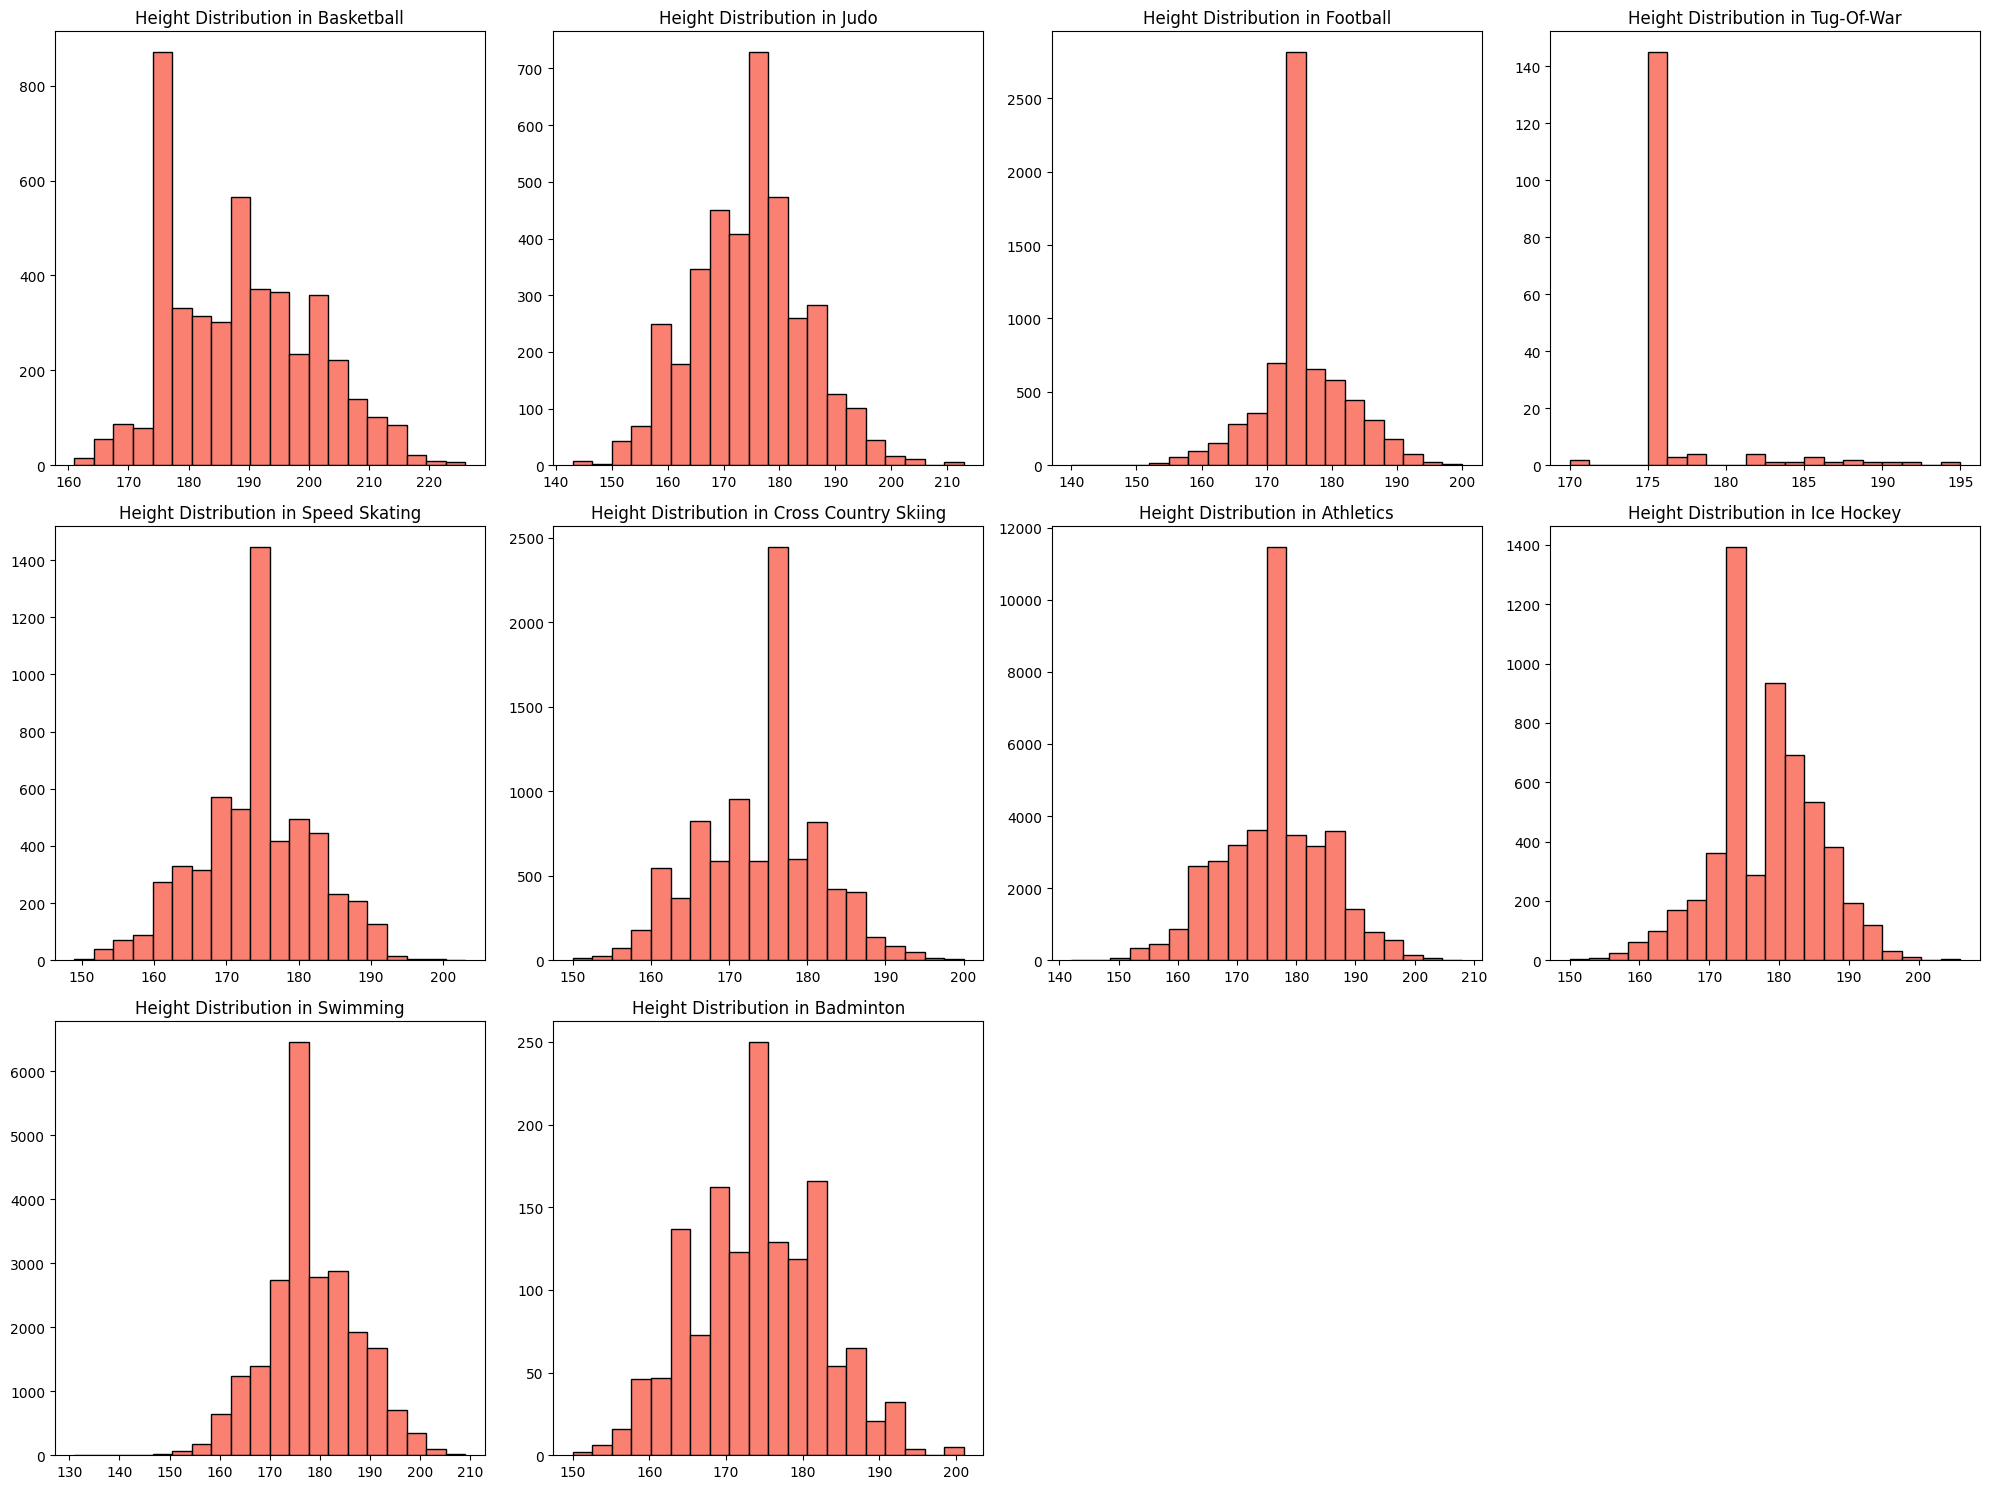

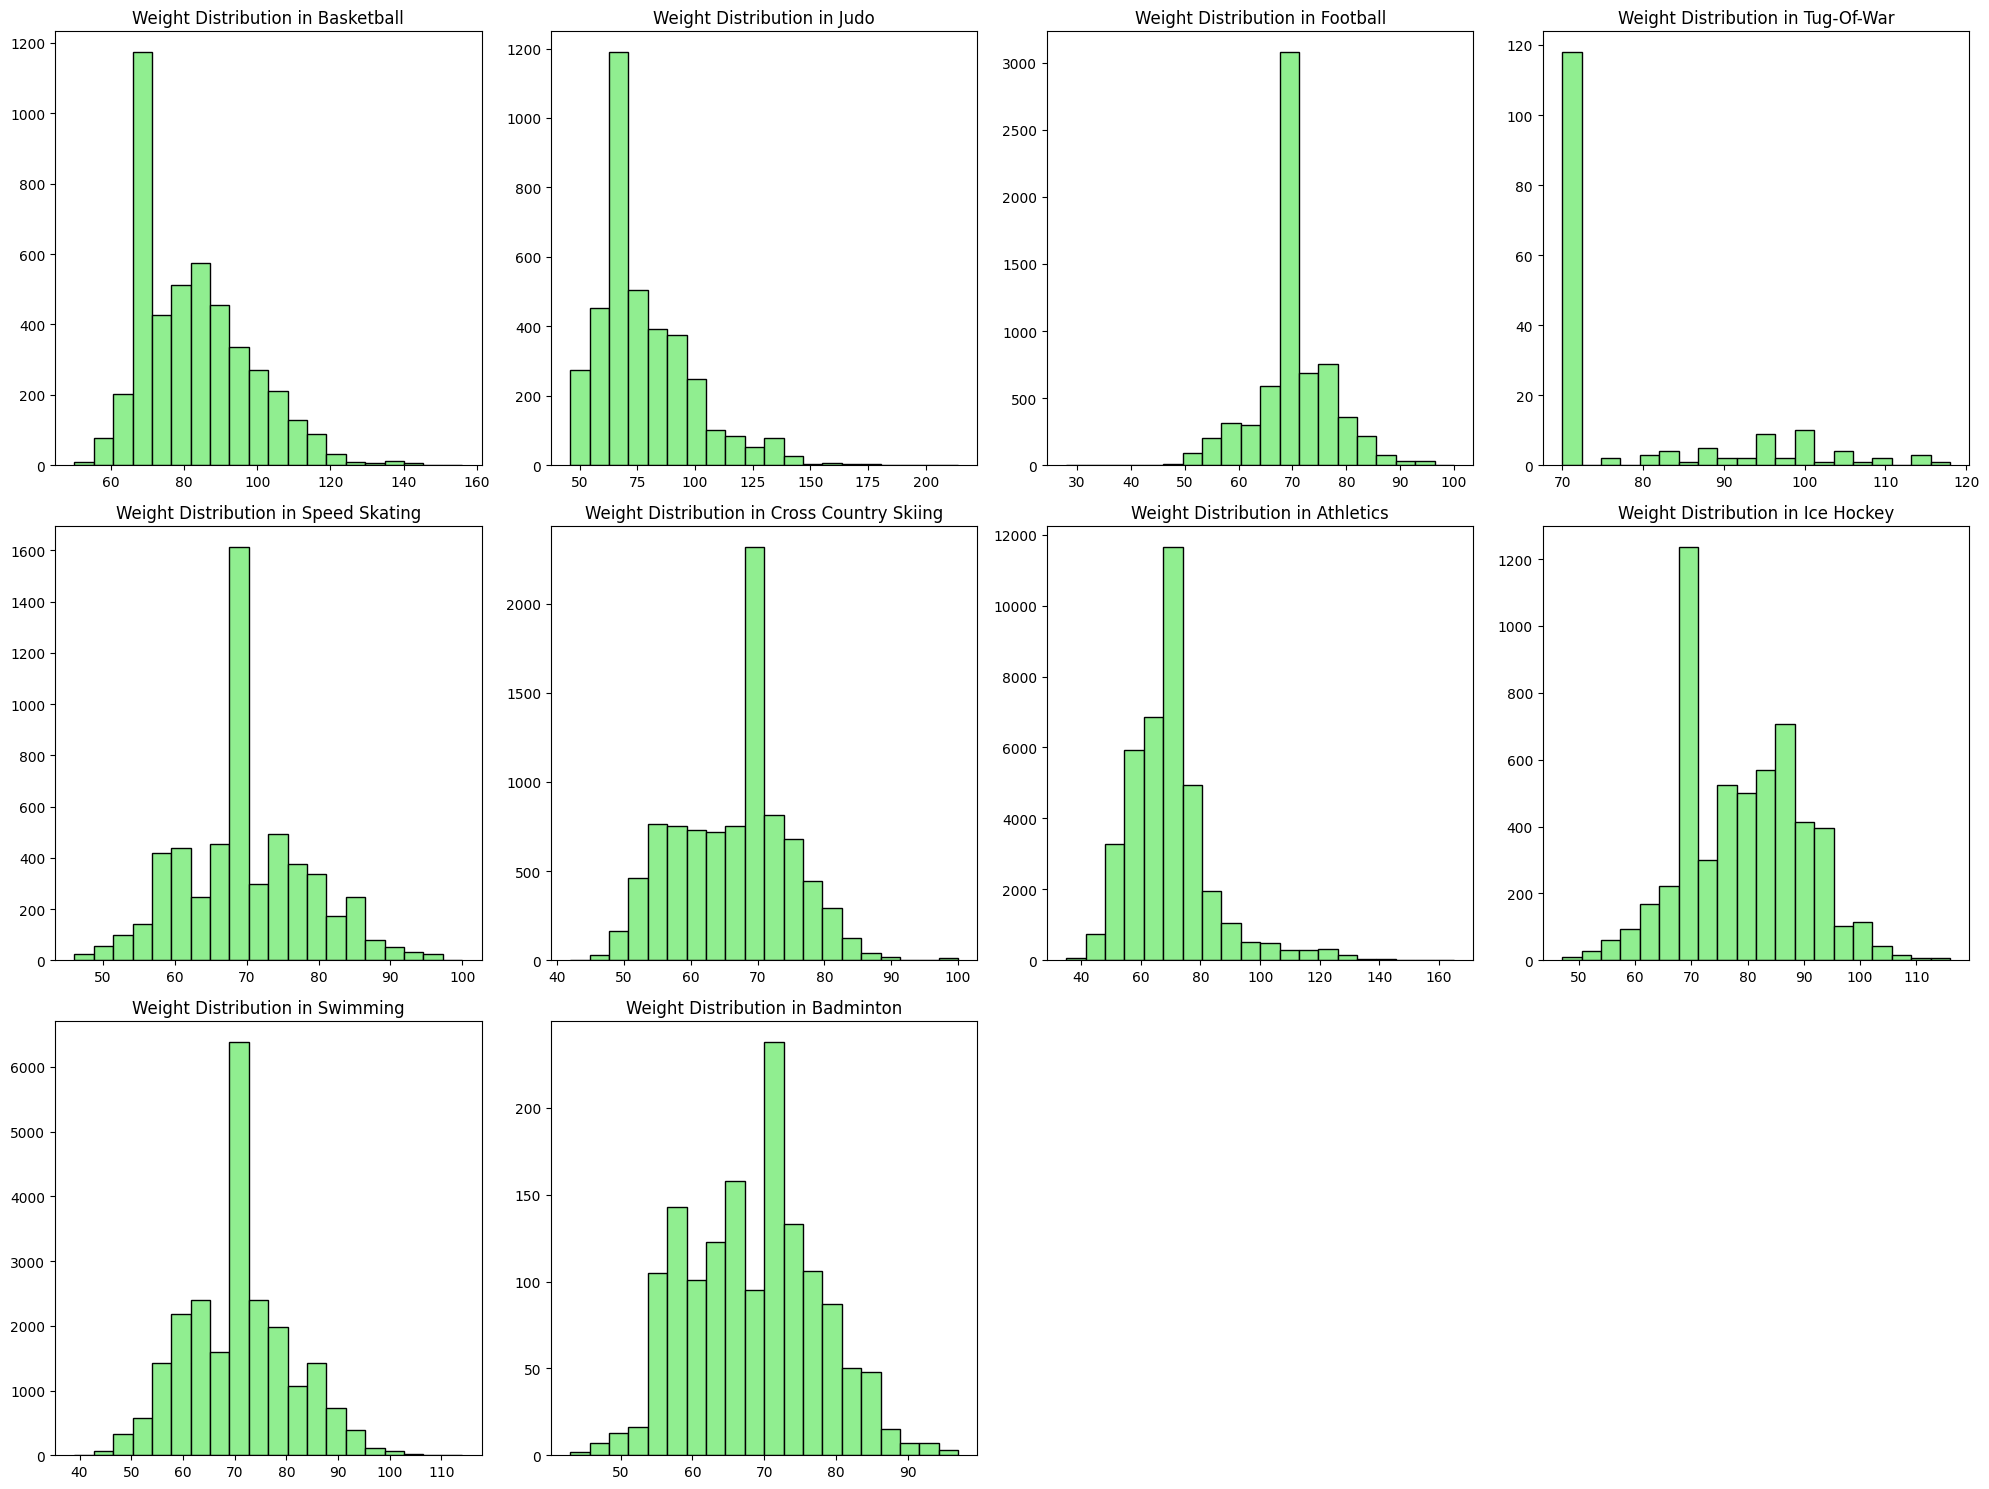

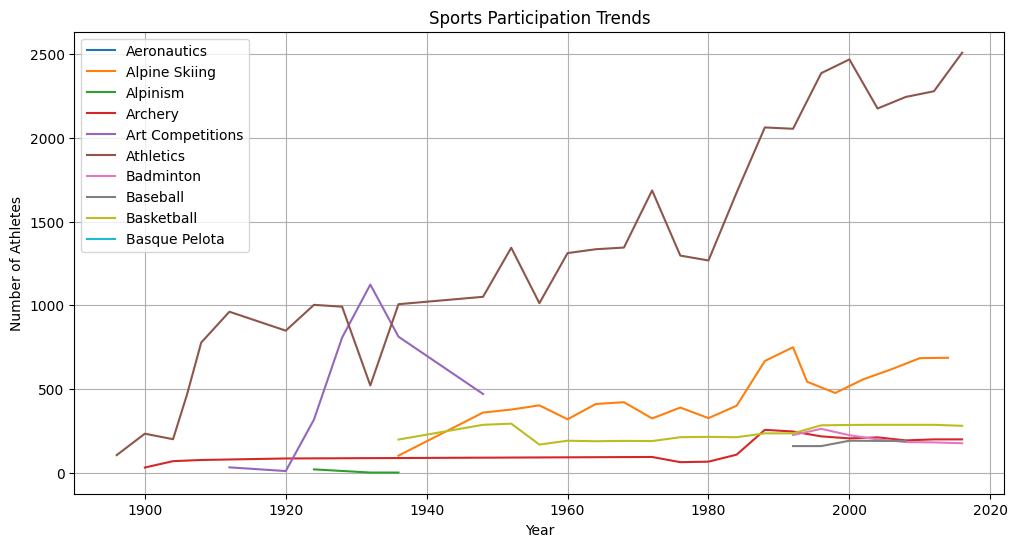

In [18]:
import matplotlib.pyplot as plt

# 1. Country-wise medal counts over time
plt.figure(figsize=(16, 8))
for country in top_10_countries:
    try:
        country_data = top_10_medal_counts.loc[country]
        plt.plot(country_data.index, country_data['Total'], label=country)
    except KeyError:
        print(f"No data found for {country}")
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Trend of Total Medals for Top 10 Countries Over Time')
plt.legend()
plt.grid(True)
plt.show()


# 2. Athlete performance distributions and correlations
sports = merged_df['Sport'].unique()
plt.figure(figsize=(20, 15))
for i, sport in enumerate(sports[:10]):  # Analyze for the first 10 sports
    plt.subplot(3, 4, i + 1)
    plt.hist(merged_df[merged_df['Sport'] == sport]['Age'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Age Distribution in {sport}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, sport in enumerate(sports[:10]):
    plt.subplot(3, 4, i + 1)
    plt.hist(merged_df[merged_df['Sport'] == sport]['Height'], bins=20, color='salmon', edgecolor='black')
    plt.title(f'Height Distribution in {sport}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, sport in enumerate(sports[:10]):
    plt.subplot(3, 4, i + 1)
    plt.hist(merged_df[merged_df['Sport'] == sport]['Weight'], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Weight Distribution in {sport}')
plt.tight_layout()
plt.show()


# 3. Trends in sports participation and performance
sports_participation = merged_df.groupby(['Sport', 'Year'])['ID'].count().reset_index()
plt.figure(figsize=(12, 6))
for sport in sports_participation['Sport'].unique()[:10]:
    sport_data = sports_participation[sports_participation['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['ID'], label=sport)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Sports Participation Trends')
plt.legend()
plt.grid(True)
plt.show()

## Summary:


### Data Analysis Key Findings
* **Top Performing Countries:** The analysis identified the top 10 countries based on total medal counts across all Olympic games included in the dataset.  A visualization of medal count trends over time for these top 10 countries was generated.
* **Athlete Attributes by Sport:** Distributions of age, height, and weight were analyzed for athletes across different sports.  The analysis used histograms for each attribute for the first 10 sports, revealing variations in physical characteristics among athletes across sports.
* **Sports Participation Trends:** Trends in the number of athletes participating in various sports over time were identified. The analysis focused on the first 10 sports, visualizing their participation trends using a line plot.
* **Missing Data Handling:** Missing values in the 'Age', 'Height', 'Weight', and 'Medal' columns were addressed.  The median was used to impute missing numerical values, while 'No Medal' replaced missing medal entries.  Missing 'region' values were filled with 'Unknown'.  A BMI feature was engineered, with potential errors being handled.

### Insights
* **Investigate Performance Metrics:** Explore additional datasets or features that could provide performance metrics within each sport, enabling a deeper analysis of athlete performance beyond physical attributes.
* **Correlation Analysis:** Perform a more in-depth correlation analysis between athlete physical attributes (age, height, weight, BMI) and medal wins to identify potential relationships or patterns.
